In [1]:
#Loading packages 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin
from datetime import datetime

/home/jovyan/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#df = pd.read_csv('data.csv')
#zillow home data
zhome_values_zip = pd.read_csv('zhome_value_zip_df.csv')
df_home = pd.DataFrame(zhome_values_zip)

#zillow rent data
df = pd.read_csv("z_rentals_zip_df.csv")
df_rent = pd.DataFrame(df)


In [3]:
#median home value
df_home.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107184.0,...,257089.0,261757.0,267452.0,273750.0,279865.0,284916.0,288326.0,290250.0,290894.0,291871.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223094.0,...,444749.0,454220.0,465824.0,479498.0,490869.0,498347.0,500609.0,498747.0,499289.0,501368.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90164.0,...,175658.0,177626.0,179773.0,183128.0,186726.0,190164.0,192396.0,194095.0,195477.0,197127.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,186206.0,...,564682.0,564481.0,566396.0,567898.0,570676.0,572891.0,574998.0,575933.0,578691.0,582277.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275596.0,...,747687.0,750970.0,756670.0,759268.0,765087.0,770360.0,775517.0,778187.0,781268.0,787104.0


In [4]:
#zillo mean rent value
df_rent.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-03-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,1219.960876,...,1655.486502,1690.358839,1703.208080,1711.182350,1692.088914,1689.688959,1720.958688,1755.355181,1756.105984,1744.762698
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1457.220113,...,1751.402759,1750.489815,1745.850412,1761.307227,1771.027384,1791.684918,1811.410335,1816.428083,1828.923975,1817.194565
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1262.982761,1266.784630,1280.314235,1266.605631,1262.631977,1277.776160,1323.625994,1352.914175,1363.806049,1341.541667
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2039.500000
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2216.568524,...,2683.419811,2722.761276,2749.056690,2808.501349,2853.536189,2956.043484,3021.904547,3080.800631,3081.106609,3087.509333


In [5]:
#zillow home_values columns dropped
before_2002 = df_home.columns[9:33]  #columns 9 -3 3 are dates 01/2000 - 12/2001.
drop_extra_columns = ["RegionID", "SizeRank", "RegionType", "StateName", "Metro"]
df_home = df_home.drop(before_2002, axis=1)
df_home = df_home.drop(drop_extra_columns, axis=1)

#zillow_rent columns dropped
columns_dropped = ["RegionID", "SizeRank", "RegionType", "StateName", "Metro"]
df_rent = df_rent.drop(columns_dropped, axis=1)

In [6]:
#home_values new columns
df_home.columns


Index(['RegionName', 'State', 'City', 'CountyName', '2002-01-31', '2002-02-28',
       '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30',
       ...
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
       '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31'],
      dtype='object', length=254)

In [7]:
#mean rent columns
df_rent.columns

Index(['RegionName', 'State', 'City', 'CountyName', '2015-03-31', '2015-04-30',
       '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
       '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
       '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
       '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
       '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
       '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
       '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
       '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
       '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
       '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-3

In [8]:
# creating new dataframe with columns renamed

#home value df
df_home2 = df_home.rename({"RegionName" : "zip_code", "State" : "state", 
                           "City" : "city", "CountyName" : "borough"}, axis = 1)

#mean rent df
df_rent2 = df_rent.rename({"RegionName" : "zip_code", "State" : "state",
                           "City" : "city", "CountyName" : "borough"}, axis = 1)

In [9]:

#replacing the '2002-01-31 colums to 'Date' and assiging their values with date data

#home data
df_home2 = df_home2.melt(id_vars=["zip_code", "state", "city", "borough"], 
                                  var_name= "date", 
                                  value_name= "home_value")
#rent data
df_rent2 = df_rent2.melt(id_vars=["zip_code", "state", "city", "borough"], 
                                  var_name= "date", 
                                  value_name= "mean_rent")

In [10]:
#new columns with dates as rows
#home value df
df_home2.head(10)


,zip_code,state,city,borough,date,home_value
0,77449,TX,NaN,Harris County,2002-01-31,109098.0
1,77494,TX,NaN,Fort Bend County,2002-01-31,226810.0
2,79936,TX,El Paso,El Paso County,2002-01-31,85005.0
3,11368,NY,New York,Queens County,2002-01-31,249885.0
4,11385,NY,New York,Queens County,2002-01-31,333404.0
5,90011,CA,Los Angeles,Los Angeles County,2002-01-31,163007.0
6,60629,IL,Chicago,Cook County,2002-01-31,163913.0
7,77084,TX,Houston,Harris County,2002-01-31,108774.0
8,91331,CA,Los Angeles,Los Angeles County,2002-01-31,181310.0
9,90650,CA,Norwalk,Los Angeles County,2002-01-31,197582.0


In [11]:
#mean rent df
df_rent2.head(10)

,zip_code,state,city,borough,date,mean_rent
0,77449,TX,NaN,Harris County,2015-03-31,1219.960876
1,77494,TX,NaN,Fort Bend County,2015-03-31,1457.220113
2,79936,TX,El Paso,El Paso County,2015-03-31,NaN
3,11368,NY,New York,Queens County,2015-03-31,NaN
4,11385,NY,New York,Queens County,2015-03-31,2216.568524
5,90011,CA,Los Angeles,Los Angeles County,2015-03-31,NaN
6,60629,IL,Chicago,Cook County,2015-03-31,NaN
7,77084,TX,Houston,Harris County,2015-03-31,1193.707894
8,91331,CA,Los Angeles,Los Angeles County,2015-03-31,NaN
9,90650,CA,Norwalk,Los Angeles County,2015-03-31,NaN


In [12]:
#changing date column to datetime
#zillow home
df_home2["date"] = pd.to_datetime(df_home2["date"])
df_home2["borough"] = df_home2["borough"].apply(str)
df_home2["city"] = df_home2["city"].apply(str)

#zillow rent
df_rent2["date"] = pd.to_datetime(df_rent2["date"])
df_rent2["borough"] = df_rent2["borough"].apply(str)
df_rent2["city"] = df_rent2["city"].apply(str)

#dhange each column to correct type

In [13]:
#    li = ['Albert', 'Louis', 'John']
#    df[df.name.isin(li)]

#creating new df where only the word NY pulls from the State column.
#zillow home data
ny_column = ["NY"]

df_home2 = df_home2[df_home2.state.isin(ny_column)]


#zillow rent data
ny_rent = ["NY"]

df_rent2 = df_rent2[df_rent2.state.isin(ny_rent)]

In [14]:
#new data frame with the column, state, only has NY
#zillow home df
df_home2

,zip_code,state,city,borough,date,home_value
3,11368,NY,New York,Queens County,2002-01-31,249885.0
4,11385,NY,New York,Queens County,2002-01-31,333404.0
11,11236,NY,New York,Kings County,2002-01-31,255687.0
14,11208,NY,New York,Kings County,2002-01-31,235676.0
15,10467,NY,New York,Bronx County,2002-01-31,174696.0
...,...,...,...,...,...,...
6855924,12724,NY,Jeffersonville,Sullivan County,2022-10-31,340127.0
6855940,14539,NY,Retsof,Livingston County,2022-10-31,152636.0
6855942,14134,NY,Chaffee,Erie County,2022-10-31,209295.0
6855979,12420,NY,Pine Bush,Ulster County,2022-10-31,425590.0


In [15]:
#zillow rent df
df_rent2

,zip_code,state,city,borough,date,mean_rent
3,11368,NY,New York,Queens County,2015-03-31,NaN
4,11385,NY,New York,Queens County,2015-03-31,2216.568524
10,11236,NY,New York,Kings County,2015-03-31,NaN
12,11208,NY,New York,Kings County,2015-03-31,NaN
13,10467,NY,New York,Bronx County,2015-03-31,1303.888993
...,...,...,...,...,...,...
550855,10004,NY,New York,New York County,2022-10-31,4823.220238
550869,10006,NY,New York,New York County,2022-10-31,4180.540793
550888,11976,NY,Water Mill,Suffolk County,2022-10-31,58555.500000
550891,11109,NY,New York,Queens County,2022-10-31,4121.017857


In [16]:
#selecting only 5 boro counties in county_name column
#zillow home
five_boros_home = df_home2[df_home2["borough"].isin(["Queens County", "New York County", "Bronx County", "Richmond County", "Kings County"])]

#zillow rent
five_boros_rent = df_rent2[df_rent2["borough"].isin(["Queens County", "New York County", "Bronx County", "Richmond County", "Kings County"])]

In [17]:
# new dataframe
#zillow home 
five_boros_home


,zip_code,state,city,borough,date,home_value
3,11368,NY,New York,Queens County,2002-01-31,249885.0
4,11385,NY,New York,Queens County,2002-01-31,333404.0
11,11236,NY,New York,Kings County,2002-01-31,255687.0
14,11208,NY,New York,Kings County,2002-01-31,235676.0
15,10467,NY,New York,Bronx County,2002-01-31,174696.0
...,...,...,...,...,...,...
6842233,10464,NY,New York,Bronx County,2022-10-31,609781.0
6843716,10004,NY,New York,New York County,2022-10-31,1081807.0
6845613,10006,NY,New York,New York County,2022-10-31,902566.0
6855021,11243,NY,New York,Kings County,2022-10-31,1426544.0


In [18]:
#zillow rent 
five_boros_rent

,zip_code,state,city,borough,date,mean_rent
3,11368,NY,New York,Queens County,2015-03-31,NaN
4,11385,NY,New York,Queens County,2015-03-31,2216.568524
10,11236,NY,New York,Kings County,2015-03-31,NaN
12,11208,NY,New York,Kings County,2015-03-31,NaN
13,10467,NY,New York,Bronx County,2015-03-31,1303.888993
...,...,...,...,...,...,...
550797,10282,NY,New York,New York County,2022-10-31,7836.527778
550823,10069,NY,New York,New York County,2022-10-31,5778.583333
550855,10004,NY,New York,New York County,2022-10-31,4823.220238
550869,10006,NY,New York,New York County,2022-10-31,4180.540793


In [19]:

five_boros_home["borough"] = five_boros_home["borough"].map({"Bronx County": "BRONX", "Kings County":"BROOKLYN",
                                                            "Queens County": "QUEENS", "Richmond County": "STATEN_ISLAND",
                                                            "New York County": "MANHATTAN"})

<ipython-input-19-81eedac8bdb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_boros_home["borough"] = five_boros_home["borough"].map({"Bronx County": "BRONX", "Kings County":"BROOKLYN",


In [20]:
five_boros_rent["borough"] = five_boros_rent["borough"].map({"Bronx County": "BRONX", "Kings County":"BROOKLYN",
                                                            "Queens County": "QUEENS", "Richmond County": "STATEN_ISLAND",
                                                            "New York County": "MANHATTAN"})

<ipython-input-20-0c71ff51d46d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_boros_rent["borough"] = five_boros_rent["borough"].map({"Bronx County": "BRONX", "Kings County":"BROOKLYN",


mapper = {
    "Bronx County": "BRONX",
    "Kings County":"BROOKLYN",
    "Queens County": "QUEENS",
    "Richmond County": "STATEN_ISLAND",
    "New York County": "MANHATTAN"
}

In [21]:

#zillow home
#five_boros_home.loc["borough"] = five_boros_home["borough"].replace(mapper)

#zillow rent
#five_boros_rent.loc["borough"] = five_boros_rent["borough"].replace(mapper)

In [22]:
#zillow home
five_boros_home = five_boros_home.dropna()
#zillow rent
five_boros_rent = five_boros_rent.dropna()

In [23]:
five_boros_home.head(10)

,zip_code,state,city,borough,date,home_value
3,11368,NY,New York,QUEENS,2002-01-31,249885.0
4,11385,NY,New York,QUEENS,2002-01-31,333404.0
11,11236,NY,New York,BROOKLYN,2002-01-31,255687.0
14,11208,NY,New York,BROOKLYN,2002-01-31,235676.0
15,10467,NY,New York,BRONX,2002-01-31,174696.0
16,11226,NY,New York,BROOKLYN,2002-01-31,323439.0
27,11373,NY,New York,QUEENS,2002-01-31,259037.0
30,11234,NY,New York,BROOKLYN,2002-01-31,293361.0
31,11220,NY,New York,BROOKLYN,2002-01-31,246950.0
35,11207,NY,New York,BROOKLYN,2002-01-31,199280.0


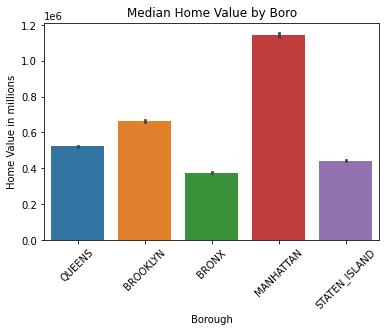

In [24]:
sns.barplot(data = pd.DataFrame(five_boros_home).reset_index(), x = "borough", y = "home_value")
plt.title("Median Home Value by Boro")
plt.xlabel("Borough")
plt.ylabel("Home Value in millions")
plt.xticks(rotation=45)

plt.show()

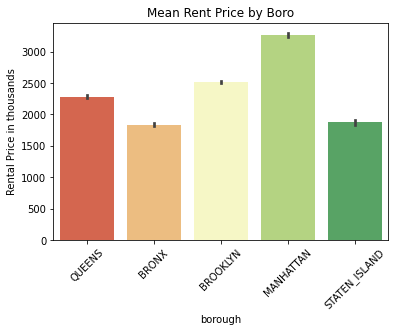

In [25]:
sns.barplot(data = pd.DataFrame(five_boros_rent).reset_index(), x = "borough", y = "mean_rent",palette='RdYlGn')
plt.title("Mean Rent Price by Boro")
plt.xlabel("borough")
plt.ylabel("Rental Price in thousands")
plt.xticks(rotation=45)

plt.show()

In [26]:
#zillow home

monthly1 = (five_boros_home["date"].dt.to_period("M"))
monthly_home_value = five_boros_home.groupby(monthly1)["home_value"].mean().to_frame()

monthly_home_value = monthly_home_value.reset_index()

#zillow rent
monthly2 = (five_boros_rent["date"].dt.to_period("M"))
monthly_rent = five_boros_rent.groupby(monthly2)["mean_rent"].mean().to_frame()
monthly_rent = monthly_rent.reset_index()



In [27]:
monthly_df = pd.merge(monthly_home_value, monthly_rent, on = "date")

monthly_df

,date,home_value,mean_rent
0,2015-03,742939.034091,2552.507677
1,2015-04,748273.159091,2560.086916
2,2015-05,752131.914773,2573.801855
3,2015-06,759171.727273,2576.271181
4,2015-07,763736.607955,2581.061952
...,...,...,...
87,2022-06,925910.073446,2954.701559
88,2022-07,930027.016949,2986.123400
89,2022-08,933617.621469,3009.743571
90,2022-09,935784.056497,2997.052818


Text(0, 0.5, 'Median Home Value')

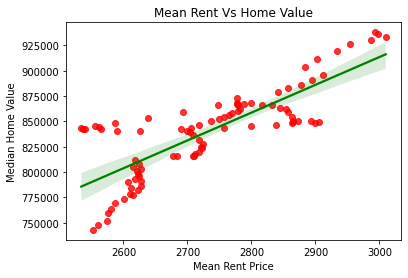

In [30]:
sns.regplot(x=monthly_df["mean_rent"], y=monthly_df["home_value"], data=monthly_df, scatter_kws={"color": "red"}, line_kws={"color" : "green"})

plt.title("Mean Rent Vs Home Value")
plt.xlabel("Mean Rent Price")
plt.ylabel("Median Home Value")


Text(0.5, 1.0, 'Monthly Mean Home Values')

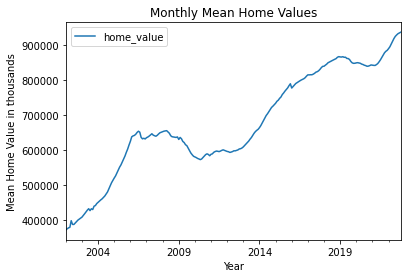

In [29]:
monthly_mean_home_value = five_boros_home.groupby(monthly1)["home_value"].mean().to_frame()
monthly_mean_home_value.plot.line()
plt.xlabel('Year')
plt.ylabel('Mean Home Value in thousands')
plt.title('Monthly Mean Home Values')

In [31]:
#zillow home
yearly1 = (five_boros_home["date"].dt.to_period("Y"))
yearly_home_value = five_boros_home.groupby(yearly1)["home_value"].mean().to_frame()
yearly_home_value = yearly_home_value.reset_index()

#zillow rent
yearly2 = (five_boros_rent["date"].dt.to_period("Y"))
yearly_rent = five_boros_rent.groupby(yearly2)["mean_rent"].mean().to_frame()
yearly_rent = yearly_rent.reset_index()




In [32]:
yearly_df = pd.merge(yearly_home_value, yearly_rent, on = "date")

yearly_df

,date,home_value,mean_rent
0,2015,761331.272727,2586.066744
1,2016,796059.340618,2622.209685
2,2017,823679.544592,2709.264719
3,2018,854907.883996,2751.508547
4,2019,860029.804430,2835.530660
5,2020,845339.889831,2745.855854
6,2021,860057.260358,2684.222391
7,2022,918546.994350,2949.658833


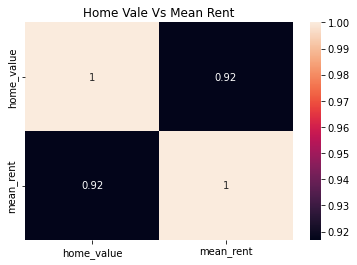

In [33]:
correlation_matrix = yearly_df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Home Vale Vs Mean Rent")
plt.show()

In [ ]:
df_before = five_boros_home[five_boros_home["date"] < 2007] 
df_after = five_boros_home[five_boros_home["date"] >= 2007]

plt.plot(df_before["date"], df_before["home_value"], label="Before AirBnb")
plt.plot(df_after["date"], df_after["home_value"], label="After AirBnb")

plt.legend()
plt.xlabel('Year')
plt.ylabel('Median Home Value')

In [ ]:
def create_mean_borough_home_value(five_boros, boro_name):
    return five_boros_home[five_boros_home["borough"] == boro_name].groupby(formatted_monthly)["home_value"].mean().to_frame()

# EDA

- How much of an effect does airbnb rentals have on the home the prices of homes?
- If Airbns's are removed from the metropolitan area will home values decrease?n the metropotlitan area?